In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
%matplotlib inline

In [8]:
df = pd.read_csv("./NYCTaxiFares.csv")

In [9]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


In [10]:
df['fare_amount'].describe()

count    120000.000000
mean         10.040326
std           7.500134
min           2.500000
25%           5.700000
50%           7.700000
75%          11.300000
max          49.900000
Name: fare_amount, dtype: float64

In [11]:
# Haversine Formula

def haversine_distance(df, lat1, long1, lat2, long2):
    """
    Calculates the haversine distance between 2 sets of GPS coordinates in df
    """
    r = 6371  # average radius of Earth in kilometers
       
    phi1 = np.radians(df[lat1])
    phi2 = np.radians(df[lat2])
    
    delta_phi = np.radians(df[lat2]-df[lat1])
    delta_lambda = np.radians(df[long2]-df[long1])
     
    a = np.sin(delta_phi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    d = (r * c) # in kilometers

    return d

In [12]:
df['dist_km'] = haversine_distance(df,'pickup_latitude',"pickup_longitude","dropoff_latitude","dropoff_longitude")

In [13]:
df.columns


Index(['pickup_datetime', 'fare_amount', 'fare_class', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'dist_km'],
      dtype='object')

In [14]:
df

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321
...,...,...,...,...,...,...,...,...,...
119995,2010-04-18 14:33:03 UTC,15.3,1,-73.955857,40.784590,-73.981941,40.736789,1,5.751348
119996,2010-04-23 10:27:48 UTC,15.3,1,-73.996329,40.772727,-74.049890,40.740413,1,5.767444
119997,2010-04-18 18:50:40 UTC,12.5,1,-73.988574,40.749772,-74.011541,40.707799,3,5.052523
119998,2010-04-13 08:14:44 UTC,4.9,0,-74.004449,40.724529,-73.992697,40.730765,1,1.208923


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   pickup_datetime    120000 non-null  object 
 1   fare_amount        120000 non-null  float64
 2   fare_class         120000 non-null  int64  
 3   pickup_longitude   120000 non-null  float64
 4   pickup_latitude    120000 non-null  float64
 5   dropoff_longitude  120000 non-null  float64
 6   dropoff_latitude   120000 non-null  float64
 7   passenger_count    120000 non-null  int64  
 8   dist_km            120000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 8.2+ MB


In [16]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   pickup_datetime    120000 non-null  datetime64[ns, UTC]
 1   fare_amount        120000 non-null  float64            
 2   fare_class         120000 non-null  int64              
 3   pickup_longitude   120000 non-null  float64            
 4   pickup_latitude    120000 non-null  float64            
 5   dropoff_longitude  120000 non-null  float64            
 6   dropoff_latitude   120000 non-null  float64            
 7   passenger_count    120000 non-null  int64              
 8   dist_km            120000 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(6), int64(2)
memory usage: 8.2 MB


In [18]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321


In [19]:
my_time = df['pickup_datetime'][0]

In [20]:
my_time.hour

8

In [21]:
# Accomodating for daylight savings time
df['EDTdate'] = df['pickup_datetime'] - pd.Timedelta(hours=4)

In [22]:
df['Hour'] = df['EDTdate'].dt.hour

In [23]:
df['AMorPM'] = np.where(df['Hour']>12,'am','pm')

In [24]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km,EDTdate,Hour,AMorPM
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312,2010-04-19 04:17:56+00:00,4,pm
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307,2010-04-17 11:43:53+00:00,11,pm
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763,2010-04-17 07:23:26+00:00,7,pm
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129,2010-04-11 17:25:03+00:00,17,am
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321,2010-04-16 22:19:01+00:00,22,am


In [25]:
df['Weekday'] = df['EDTdate'].dt.strftime("%a")

In [26]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km,EDTdate,Hour,AMorPM,Weekday
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312,2010-04-19 04:17:56+00:00,4,pm,Mon
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307,2010-04-17 11:43:53+00:00,11,pm,Sat
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763,2010-04-17 07:23:26+00:00,7,pm,Sat
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129,2010-04-11 17:25:03+00:00,17,am,Sun
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321,2010-04-16 22:19:01+00:00,22,am,Fri


In [27]:
cat_cols = ["Hour","AMorPM","Weekday"]

In [28]:
cont_cols = ['pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'dist_km']

In [29]:
df.columns

Index(['pickup_datetime', 'fare_amount', 'fare_class', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'dist_km', 'EDTdate', 'Hour', 'AMorPM', 'Weekday'],
      dtype='object')

In [30]:
y_col = ['fare_amount']

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   pickup_datetime    120000 non-null  datetime64[ns, UTC]
 1   fare_amount        120000 non-null  float64            
 2   fare_class         120000 non-null  int64              
 3   pickup_longitude   120000 non-null  float64            
 4   pickup_latitude    120000 non-null  float64            
 5   dropoff_longitude  120000 non-null  float64            
 6   dropoff_latitude   120000 non-null  float64            
 7   passenger_count    120000 non-null  int64              
 8   dist_km            120000 non-null  float64            
 9   EDTdate            120000 non-null  datetime64[ns, UTC]
 10  Hour               120000 non-null  int32              
 11  AMorPM             120000 non-null  object             
 12  Weekday            120000 non-

In [32]:
for cat in cat_cols:
    df[cat] = df[cat].astype('category')

In [33]:
df.dtypes

pickup_datetime      datetime64[ns, UTC]
fare_amount                      float64
fare_class                         int64
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dist_km                          float64
EDTdate              datetime64[ns, UTC]
Hour                            category
AMorPM                          category
Weekday                         category
dtype: object

In [34]:
df['Weekday'].head()

0    Mon
1    Sat
2    Sat
3    Sun
4    Fri
Name: Weekday, dtype: category
Categories (7, object): ['Fri', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed']

In [35]:
df['AMorPM'].cat.codes

0         1
1         1
2         1
3         0
4         0
         ..
119995    1
119996    1
119997    0
119998    1
119999    1
Length: 120000, dtype: int8

In [36]:
df['AMorPM'].cat.categories

Index(['am', 'pm'], dtype='object')

In [37]:
df['AMorPM'].cat.codes.values # numpy

array([1, 1, 1, ..., 0, 1, 1], dtype=int8)

In [38]:
hr = df['Hour'].cat.codes.values

In [39]:
ampm = df['AMorPM'].cat.codes.values

In [40]:
wkdy = df['Weekday'].cat.codes.values

In [41]:
cats = np.stack([hr,ampm,wkdy],axis=1)

In [42]:
cats

array([[ 4,  1,  1],
       [11,  1,  2],
       [ 7,  1,  2],
       ...,
       [14,  0,  3],
       [ 4,  1,  5],
       [12,  1,  2]], dtype=int8)

In [43]:
cats = torch.tensor(cats,dtype=torch.int64)

In [44]:
conts = np.stack([df[col].values for col in cont_cols],axis=1)

In [45]:
conts = torch.tensor(conts,dtype=torch.float)

In [46]:
y=torch.tensor(df[y_col].values,dtype=torch.float).reshape(-1,1)

In [47]:
cats.shape

torch.Size([120000, 3])

In [48]:
conts.shape

torch.Size([120000, 6])

In [49]:
y.shape

torch.Size([120000, 1])

In [50]:
cat_sz =[len(df[col].cat.categories) for col in cat_cols]

In [51]:
cat_sz

[24, 2, 7]

In [52]:
emb_szs = [(size,min(50,(size+1)//2)) for size in cat_sz]

In [53]:
emb_szs

[(24, 12), (2, 1), (7, 4)]

In [54]:
catz = cats[:4]

In [55]:
catz

tensor([[ 4,  1,  1],
        [11,  1,  2],
        [ 7,  1,  2],
        [17,  0,  3]])

In [56]:
selfembeds = nn.ModuleList([nn.Embedding(ni,nf) for ni,nf in emb_szs])

In [57]:
selfembeds

ModuleList(
  (0): Embedding(24, 12)
  (1): Embedding(2, 1)
  (2): Embedding(7, 4)
)

In [58]:
embeddingz = []
for i , e in enumerate(selfembeds):
    embeddingz.append(e(catz[:,i]))

In [59]:
embeddingz

[tensor([[ 1.6062, -0.7401,  0.2287, -0.5911,  1.4408,  0.2409,  1.0812, -1.7744,
          -0.0114, -1.0993, -0.3349,  1.3301],
         [-1.1712,  1.1380,  0.0120, -1.4392,  0.1428, -0.6252,  0.7430,  0.5259,
          -0.7863,  0.1568, -0.1317, -0.4979],
         [-0.4317,  0.8210, -0.2180, -0.4296, -1.3157, -0.8981, -0.2648,  0.7655,
          -1.0784,  0.2955,  0.0878,  1.3349],
         [-0.4784,  0.8915,  0.7114, -0.2249,  0.8412, -0.9925, -0.4884,  0.7450,
           0.5359, -0.7796,  1.0038, -0.4089]], grad_fn=<EmbeddingBackward0>),
 tensor([[-0.5603],
         [-0.5603],
         [-0.5603],
         [ 1.3705]], grad_fn=<EmbeddingBackward0>),
 tensor([[ 0.0412,  1.0007, -0.8691,  0.2729],
         [-1.4358, -0.6578, -0.7081,  1.2972],
         [-1.4358, -0.6578, -0.7081,  1.2972],
         [-0.4193,  0.7126, -1.4062, -0.4647]], grad_fn=<EmbeddingBackward0>)]

In [60]:
z = torch.cat(embeddingz,1)

In [61]:
z

tensor([[ 1.6062, -0.7401,  0.2287, -0.5911,  1.4408,  0.2409,  1.0812, -1.7744,
         -0.0114, -1.0993, -0.3349,  1.3301, -0.5603,  0.0412,  1.0007, -0.8691,
          0.2729],
        [-1.1712,  1.1380,  0.0120, -1.4392,  0.1428, -0.6252,  0.7430,  0.5259,
         -0.7863,  0.1568, -0.1317, -0.4979, -0.5603, -1.4358, -0.6578, -0.7081,
          1.2972],
        [-0.4317,  0.8210, -0.2180, -0.4296, -1.3157, -0.8981, -0.2648,  0.7655,
         -1.0784,  0.2955,  0.0878,  1.3349, -0.5603, -1.4358, -0.6578, -0.7081,
          1.2972],
        [-0.4784,  0.8915,  0.7114, -0.2249,  0.8412, -0.9925, -0.4884,  0.7450,
          0.5359, -0.7796,  1.0038, -0.4089,  1.3705, -0.4193,  0.7126, -1.4062,
         -0.4647]], grad_fn=<CatBackward0>)

In [62]:
selfembdrop = nn.Dropout(0.4)

In [63]:
z = selfembdrop(z)

In [64]:
z

tensor([[ 2.6771, -0.0000,  0.3811, -0.9852,  0.0000,  0.4014,  0.0000, -2.9573,
         -0.0190, -1.8322, -0.5582,  0.0000, -0.9338,  0.0686,  1.6678, -0.0000,
          0.4548],
        [-0.0000,  0.0000,  0.0199, -2.3987,  0.2380, -0.0000,  0.0000,  0.8764,
         -1.3104,  0.2613, -0.0000, -0.0000, -0.9338, -2.3930, -0.0000, -1.1801,
          0.0000],
        [-0.7195,  1.3684, -0.0000, -0.0000, -2.1928, -0.0000, -0.0000,  0.0000,
         -0.0000,  0.0000,  0.0000,  0.0000, -0.9338, -0.0000, -1.0963, -1.1801,
          0.0000],
        [-0.0000,  1.4858,  0.0000, -0.3749,  0.0000, -1.6542, -0.8140,  0.0000,
          0.8932, -1.2993,  1.6729, -0.0000,  0.0000, -0.6988,  0.0000, -2.3437,
         -0.7745]], grad_fn=<MulBackward0>)

In [65]:
class TabularModel(nn.Module):

    def __init__(self, emb_szs, n_cont, out_sz, layers, p=0.5):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(ni, nf) for ni,nf in emb_szs])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        
        layerlist = []
        n_emb = sum((nf for ni,nf in emb_szs))
        n_in = n_emb + n_cont
        
        for i in layers:
            layerlist.append(nn.Linear(n_in,i)) 
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))
            
        self.layers = nn.Sequential(*layerlist)
    
    def forward(self, x_cat, x_cont):
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)
        
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        x = self.layers(x)
        return x 

In [66]:
torch.manual_seed(33)
model = TabularModel(emb_szs, conts.shape[1], 1, [200,100], p=0.4)

In [67]:
model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(24, 12)
    (1): Embedding(2, 1)
    (2): Embedding(7, 4)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=23, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=1, bias=True)
  )
)

In [68]:
criterion = nn.MSELoss()

In [69]:
optimizer = torch.optim.Adam(model.parameters(),lr = 0.001)

In [70]:
batch_size = 60000
test_size = int(batch_size*0.2)

In [71]:
cat_train = cats[:batch_size-test_size]
cat_test = cats[batch_size-test_size:batch_size]
con_train = conts[:batch_size-test_size]
con_test = conts[batch_size-test_size:batch_size]
y_train = y[:batch_size-test_size]
y_test = y[batch_size-test_size:batch_size]

In [72]:
len(cat_train)

48000

In [73]:
len(con_train)

48000

In [74]:
len(cat_test)

12000

In [78]:
import time
start_time = time.time()
epochs =100
losses = []

for i in range(epochs):
    i+=1
    y_pred = model(cat_train,con_train)
    loss = torch.sqrt(criterion(y_pred,y_train))# RMSE
    losses.append(loss.item())
    
    if i%10==1:
        print(f'epoch : {i} loss is {loss}')
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

duration = time.time() - start_time
print(f'Training took {duration/60} minutes')

epoch : 1 loss is 5.017561435699463
epoch : 11 loss is 4.6269330978393555
epoch : 21 loss is 4.336523532867432
epoch : 31 loss is 4.09916353225708
epoch : 41 loss is 3.906921625137329
epoch : 51 loss is 3.8818070888519287
epoch : 61 loss is 3.7990200519561768
epoch : 71 loss is 3.7951719760894775
epoch : 81 loss is 3.7251484394073486
epoch : 91 loss is 3.7097721099853516
Training took 0.7204601963361105 minutes


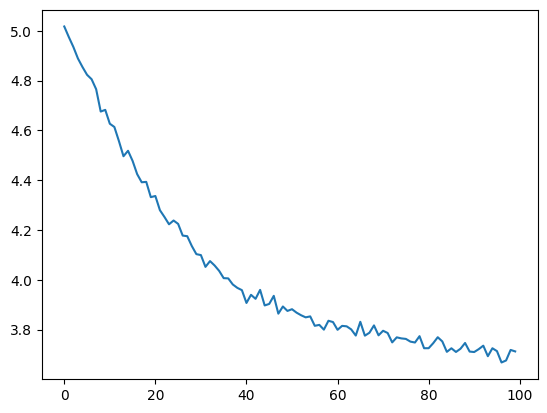

In [79]:
plt.plot(range(epochs),losses)

In [80]:
with torch.no_grad():
    y_val = model(cat_test,con_test)
    loss = torch.sqrt(criterion(y_val,y_test))# RMSE

In [82]:
for i in range(10):
    print(f'{i}.) Predicted {y_val[i].item():8.2f} TRUE: {y_test[i].item():8.2f}')

0.) Predicted     5.60 TRUE:     2.90
1.) Predicted    13.10 TRUE:     5.70
2.) Predicted     7.66 TRUE:     7.70
3.) Predicted    14.26 TRUE:    12.50
4.) Predicted     6.89 TRUE:     4.10
5.) Predicted     5.95 TRUE:     5.30
6.) Predicted     2.37 TRUE:     3.70
7.) Predicted    19.32 TRUE:    14.50
8.) Predicted     5.62 TRUE:     5.70
9.) Predicted    13.97 TRUE:    10.10


In [83]:
torch.save(model.state_dict(),'TaxiModel.pt')